### Udacity Data Analysis Nanodegree
### Project 5: Communicate data findings
---

# Part I - Airline delay prediction - Data Wrangling
## by Juanita Smith


- [Introduction](#intro)
- [Step 1: Data Gathering](#datagathering)
- [Step 2: Assessing](#assessing)
- [Step 3: Data Cleaning](#datacleaning)
- [Step 4: Save cleaned data](#save)
- [References](#references)
- [Submission](#submission)

<a id='intro'></a>
<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;"> Introduction</span>

#### Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is our chance to find out!

> This dataset reports flights in the United States, including carriers, arrival and departure delays, with reasons for delays, from 1987 to 2008. Due to large data volume, only years 2003 - 2008 will analysed in this project.
> - See more information about the data from the data expo challenge in 2009 [here](https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009).
> - See a full description of the features [here](https://www.transtats.bts.gov/DatabaseInfo.asp?QO_VQ=EFD&Yv0x=D.)
> - Data can be downloaded from [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7).

This analysis will be focused on **predicting flight delays**

### Dictionary:
1) Year: 1987-2008 
2) Month: 1-12 
3) DayofMonth: 1-31 
4) DayOfWeek: 1 (Monday) - 7 (Sunday) 
5) DepTime: actual departure time from gate (local, hhmm) 
6) CRSDepTime: scheduled departure time from gate (local, hhmm) 
7) ArrTime: actual arrival time at gate (local, hhmm) 
8) CRSArrTime: scheduled arrival time at date (local, hhmm) 
9) UniqueCarrier: unique carrier code 
10) FlightNum: flight number 
11) TailNum: plane tail number 
12) ActualElapsedTime: The time computed from gate departure time to gate arrival time in minutes
13) CRSElapsedTime: The time computed from gate departure time to gate arrival time in minutes
14) AirTime: in minutes 
15) ArrDelay: arrival delay, in minutes 
16) DepDelay: departure delay, in minutes 
17) Origin: origin IATA airport code 
18) Destination: IATA airport code 
19) Distance: in miles 
20) TaxiIn: The time elapsed between wheels down and arrival at the destination airport gate in minutes
21) TaxiOut: The time elapsed between departure from the origin airport gate and wheels off in minutes
22) Cancelled: 1 = yes, 0 = no 
23) CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
24) Diverted: 1 = yes, 0 = no 
25) CarrierDelay: subcategory of arrDelay in minutes
26) WeatherDelay: subcategory of arrDelay in minutes 
27) NASDelay: subcategory of arrDelay in minutes 
28) SecurityDelay: subcategory of arrDelay in minutes 
29) LateAircraftDelay: subcategory of arrDelay in minutes


**Important to note:** According to the documentation, a late flight is defined as a flight arriving or departing 15 minutes or more after the scheduled time.

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import glob
import os

# clear the garbage to free memory as we are working with huge datasets
import gc 

# import warnings
# warnings.filterwarnings("ignore")

# Import custom modules
from src.utils import reduce_mem_usage

# set plots to be embedded inline
%matplotlib inline

# suppress matplotlib user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# use high resolution if this project is run on an apple device
%config InlineBackend.figure_format='retina'

# Make your Jupyter Notebook wider
from IPython.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))

# environment settings
# display all columns and rows during visual inspection
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# stop scientific notation on graphs
pd.options.display.float_format = '{:.0f}'.format

In [2]:
sns.set_style("whitegrid")
BASE_COLOR = sns.color_palette()[0]

In [3]:
FILE_NAME_RAW = '../data/flights_raw.pkl'
FILE_NAME_CLEAN = '../data/flights_clean.pkl'

<a id='datagathering'></a>
<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">Step 1: Data Gathering</span>

Compressed data in format 'bz2' was downloaded in bulk from above link, one file per year from 1987 to 2008. Uncompress each file, and merge the data into one big dataframe.
Due to data size, only read the last 5 years of data

In [4]:
# get the last 5 years of saved archived data files available from 1987 to 2008

start_time = time.time()

# Get CSV files list from a folder
path = '../data/dataverse_files'
csv_files = glob.glob(path + "/*.csv.bz2")
csv_files.sort()

# get last 5 years of data
flights = pd.concat((pd.read_csv(f, compression='bz2', encoding='iso-8859-1') for f in csv_files[-6:]))
flights.reset_index(inplace=True, drop=True)

end_time = time.time()
print('Executing time: {} min'.format((end_time - start_time)/60))

/var/folders/4p/r9m3gynn3wj6h4yh4_lwz5fw0000gn/T/ipykernel_6730/727796342.py:11: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.concat((pd.read_csv(f, compression='bz2', encoding='iso-8859-1') for f in csv_files[-6:]))


Executing time: 3.1025292833646136 min


In [5]:
flights.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003,1,29,3,1651,1655,1912,1913,UA,1017,N202UA,141,138,119,-1,-4,ORD,MSY,837,5,17,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2003,1,30,4,1654,1655,1910,1913,UA,1017,N311UA,136,138,108,-3,-1,ORD,MSY,837,2,26,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2003,1,31,5,1724,1655,1936,1913,UA,1017,N317UA,132,138,110,23,29,ORD,MSY,837,5,17,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [6]:
# First, as this is a large dataset, lets reduce the memory of the dataset to make further analysis easier
flights = reduce_mem_usage(flights)


Triggering memory optimization.......

Memory usage of dataframe is 8350.68 MB
Memory usage after optimization is: 2987.53 MB
Decreased by 64.2%


In [7]:
# save the consolidated raw file 
flights.to_pickle(FILE_NAME_RAW)

<a id='assessing'></a>
<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">Step 2: Assessing</span>

In [8]:
# # load the consolidated raw file
flights = pd.read_pickle(FILE_NAME_RAW)

In [9]:
# visual inspection using a sample
flights.sample(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5468308,2003,11,10,1,1205,1205,1415,1430,WN,603,N402,70,85,60,-15,0,BUR,PHX,369,2,8,0,NaN,0,0,0,0,0,0
24286382,2006,7,11,2,654,700,800,810,WN,711,N454,66,70,50,-10,-6,BDL,BWI,283,4,12,0,NaN,0,0,0,0,0,0
21774986,2006,2,4,6,2004,2005,2108,2104,AA,1805,N3ALAA,63,59,47,3,-1,TPA,MIA,204,5,11,0,NaN,0,0,0,0,0,0
11511284,2004,9,13,1,555,600,1353,1350,UA,192,N464UA,298,290,279,3,-5,LAX,IAD,2288,4,15,0,NaN,0,0,0,0,0,0
17396387,2005,7,16,6,1538,1540,1753,1753,OH,5784,N457CA,135,133,98,0,-2,JFK,CVG,589,3,34,0,NaN,0,0,0,0,0,0
30566908,2007,5,30,3,1012,1020,1138,1129,OO,6265,N296SW,86,69,50,9,-8,CPR,DEN,230,10,26,0,NaN,0,0,0,0,0,0
5450195,2003,11,24,1,646,650,846,851,US,823,N749UW,120,121,106,-5,-4,JAX,PHL,742,5,9,0,NaN,0,0,0,0,0,0
9138045,2004,5,27,4,1903,1800,2046,1935,DL,485,N317DL,103,95,77,71,63,CVG,ATL,373,6,20,0,NaN,0,53,0,8,0,10
25738407,2006,9,6,3,553,600,907,904,UA,668,N576UA,134,124,99,3,-7,ORD,LGA,733,10,25,0,NaN,0,0,0,0,0,0
13691067,2005,1,4,2,1055,945,1230,1115,WN,1614,N332,95,90,73,75,70,SMF,PDX,479,11,11,0,NaN,0,70,0,5,0,0


>**Observations from visual inspection:**

    - All time columns `DepTime, CRSDepTime, ArrTime, CRSArrTime with format hhmm, was converted to a number, dropping leading zero's
    - `Year, month, DayOfMonth` together make up a date field which can be used for time series investigations, to be considered during feature engineering
    - Column `Cancelled` looks like it could be a boolean field
    - ArrDelay and DepDelay sometimes have negative numbers, I assume these are not delays but early departures and arrivals - to be further investigated
    - Looks like the reason for delay features at the end of the dataset, represent a breakdown of the total delay in arrivals (ArrDelay) - to be further investigated
    - Column headings start with a capital letter
    - When `CancellationCode` is 0, means flight was not cancelled, we see NaN as value in CancellationCode. It's not missing as such, but rather an indication of a cancelled flight

#### What is the structure of the dataset?

In [10]:
flights.shape

(37742760, 29)

#### Inspect the data types and missing values

In [11]:
flights.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37742760 entries, 0 to 37742759
Data columns (total 29 columns):
 #   Column             Non-Null Count     Dtype  
---  ------             --------------     -----  
 0   Year               37742760 non-null  int16  
 1   Month              37742760 non-null  int8   
 2   DayofMonth         37742760 non-null  int8   
 3   DayOfWeek          37742760 non-null  int8   
 4   DepTime            37032680 non-null  float16
 5   CRSDepTime         37742760 non-null  int16  
 6   ArrTime            36954468 non-null  float16
 7   CRSArrTime         37742760 non-null  int16  
 8   UniqueCarrier      37742760 non-null  object 
 9   FlightNum          37742760 non-null  int16  
 10  TailNum            37673823 non-null  object 
 11  ActualElapsedTime  36954467 non-null  float16
 12  CRSElapsedTime     37741354 non-null  float16
 13  AirTime            36954468 non-null  float16
 14  ArrDelay           36954467 non-null  float16
 15  DepDelay     

In [12]:
# for further programmatic inspection take a sample to avoid performance issues, as we are working with a large dataset > 2GB
sample = np.random.choice(flights.shape[0], 500000, replace=False)
flight_sample = flights.loc[sample,:].copy()
flight_sample.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11138479,2004,8,14,6,550,600,625,638,AS,72,N771AS,35,38,20,-13,-10,SIT,JNU,95,6,9,0,NaN,0,0,0,0,0,0
1000396,2003,2,16,7,1124,1130,1428,1440,B6,209,N546JB,364,370,166,-12,-6,JFK,LGB,2465,4,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8509025,2004,4,24,6,1758,1800,2009,2026,UA,127,N411UA,251,266,225,-17,-2,ORD,LAX,1745,4,22,0,NaN,0,0,0,0,0,0
22291300,2006,3,15,3,1032,1025,1334,1344,NW,676,N348NW,122,139,105,-10,7,MSP,DCA,931,7,10,0,NaN,0,0,0,0,0,0
28014041,2007,1,1,1,845,845,1045,1105,XE,2563,N12175,120,140,95,-20,0,STL,IAH,668,12,13,0,NaN,0,0,0,0,0,0


### Missing data
How much missing data do we have in columns and rows ?

#### Missing data in columns

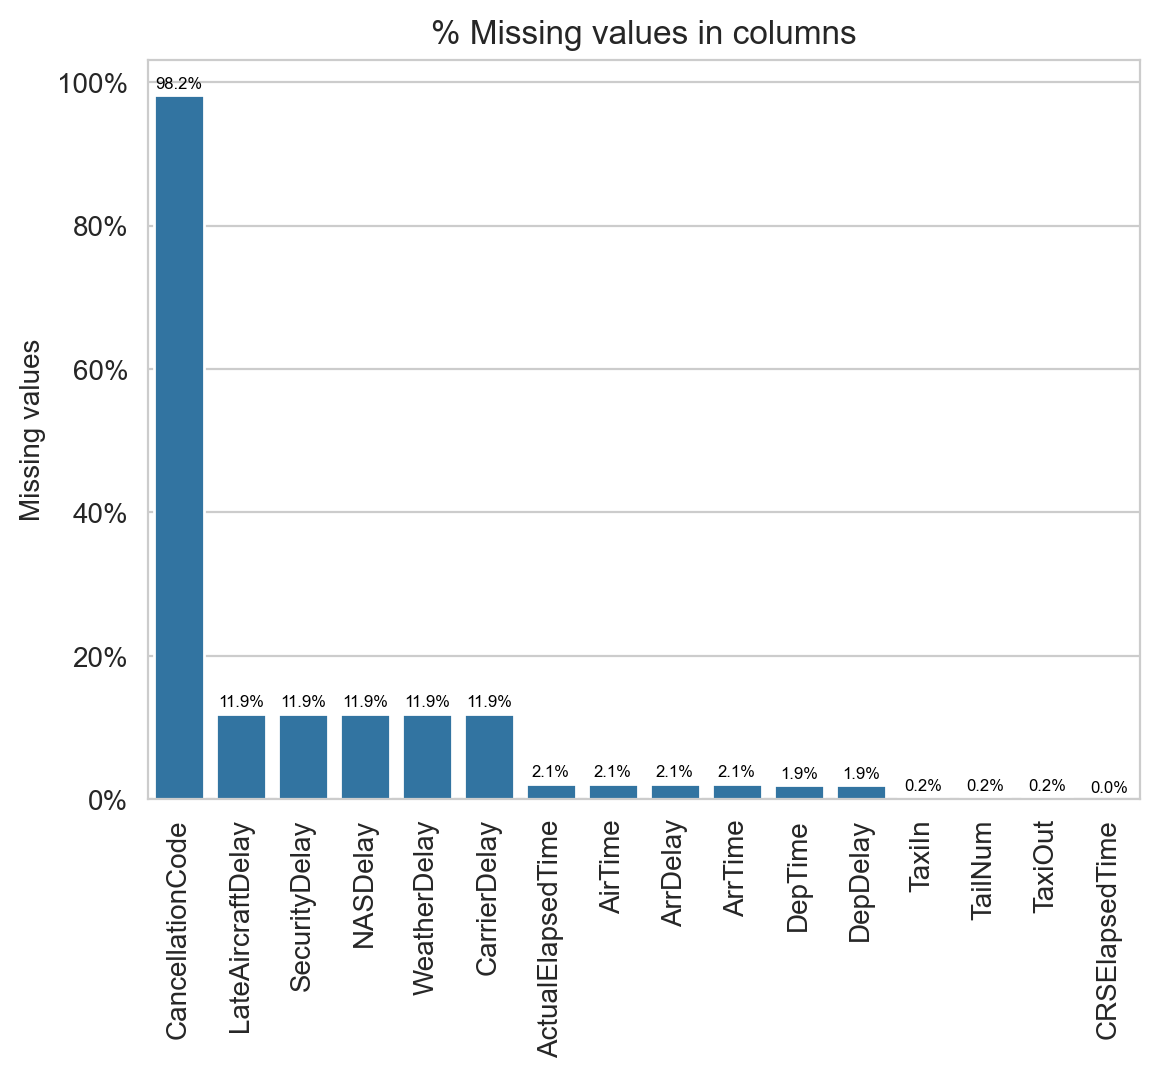

In [13]:
# Display columns with missing values
na_counts = flight_sample.isna().sum().sort_values(ascending=False) 

# Drop columns with no missing values
na_counts = na_counts[na_counts > 0]

sns.barplot(x=na_counts.index.values, y=na_counts/flight_sample.shape[0]*100, color=BASE_COLOR)
plt.xticks(rotation=90)
yticks = np.arange(0, 101, 20)
ylabels = ['{}%'.format(v) for v in yticks]
plt.ylabel('Missing values')
plt.title('% Missing values in columns')
plt.yticks(yticks, ylabels)

# get current tick locations and labels
locs, labels = plt.xticks()

# for each bar, print a % text at the top of each bar
for loc, label in zip(locs,labels):
    count = na_counts[label.get_text()]/flight_sample.shape[0]*100
    pct_string = '{:0.1f}%'.format(count)
    plt.text(loc, count+1, pct_string, ha='center', color='black', fontsize=6)

plt.show()
# plt.ticklabel_format(style='plain', axis='y')

In [14]:
# Take a closer look at records where features like 'AirTime' is missing. It looks like when AirTime is missing, ArrDelay, ArrTime, DepTime and DepDelay could also be missing
flight_sample.loc[flight_sample['AirTime'].isna()][:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3717969,2003,7,22,2,NaN,1540,NaN,2355,CO,1503,0,NaN,315,NaN,NaN,NaN,LAX,EWR,2454,0,0,1,A,0,0,0,0,0,0
29470647,2007,3,16,5,NaN,1217,NaN,1429,FL,366,N939AT,NaN,132,NaN,NaN,NaN,ATL,LGA,761,0,0,1,B,0,0,0,0,0,0
4344180,2003,9,15,1,NaN,1345,NaN,1458,US,836,0,NaN,73,NaN,NaN,NaN,PHL,ALB,212,0,0,1,C,0,0,0,0,0,0
35793597,2008,1,29,2,NaN,1420,NaN,1608,NW,932,N610NW,NaN,108,NaN,NaN,NaN,MEM,ORD,491,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
6459483,2003,12,5,5,NaN,1750,NaN,1936,DH,6286,N411FJ,NaN,106,NaN,NaN,NaN,CVG,PHL,507,0,0,1,C,0,0,0,0,0,0
10772972,2004,8,31,2,NaN,717,NaN,1049,NW,1212,N314US,NaN,152,NaN,NaN,NaN,MSP,BDL,1050,0,0,1,A,0,0,0,0,0,0
21559976,2006,2,22,3,NaN,720,NaN,1041,UA,163,000000,NaN,381,NaN,NaN,NaN,BOS,LAX,2611,0,0,1,A,0,0,0,0,0,0
29085499,2007,2,13,2,NaN,1825,NaN,2016,DL,1738,N904DL,NaN,111,NaN,NaN,NaN,DAY,ATL,432,0,0,1,B,0,0,0,0,0,0
6973891,2004,1,31,6,NaN,1616,NaN,2205,AA,1890,0,NaN,229,NaN,NaN,NaN,LAX,ORD,1745,0,0,1,A,0,0,0,0,0,0
21499347,2006,2,12,7,NaN,915,NaN,1035,OO,6244,0,NaN,80,NaN,NaN,NaN,SFO,SBA,262,0,0,1,B,0,0,0,0,0,0


**Observations missing values in Columns:**

- When AirTime is missing, the flight seems to be always cancelled. Is this the case for 'Diverted' flights also ?
- When a flight is NOT cancelled, CancellationCode is NaN. It's not really a missing value, it's just that the flight is not cancelled.

In [15]:
# Is airtime, and related columns also missing when a flight is diverted?
flight_sample.loc[flight_sample['Diverted'] == 1][:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
32295579,2007,8,15,3,1909,1915,NaN,2025,WN,1797,N433LV,NaN,70,NaN,NaN,-6,SAN,LAS,258,0,8,0,NaN,1,0,0,0,0,0
16976464,2005,6,23,4,1839,1701,NaN,1822,HP,639,N654AW,NaN,261,NaN,NaN,98,TPA,PHX,1788,0,19,0,NaN,1,0,0,0,0,0
11955409,2004,10,27,3,750,615,NaN,810,WN,1130,N657SW,NaN,55,NaN,NaN,95,GEG,BOI,287,0,10,0,NaN,1,0,0,0,0,0
10479372,2004,7,16,5,1157,1200,NaN,1458,AA,1107,N462AA,NaN,178,NaN,NaN,-3,EWR,MIA,1086,574,25,0,NaN,1,0,0,0,0,0
3887983,2003,8,9,6,1005,1005,NaN,1305,WN,349,N679,NaN,180,NaN,NaN,0,PVD,TPA,1137,0,10,0,NaN,1,0,0,0,0,0
35481704,2008,1,15,2,2116,2125,NaN,2237,XE,2760,N14916,NaN,72,NaN,NaN,-8,IAH,HRL,295,NaN,16,0,NaN,1,NaN,NaN,NaN,NaN,NaN
21658780,2006,2,3,5,700,700,NaN,824,MQ,3141,N816AE,NaN,84,NaN,NaN,0,SJC,SAN,417,0,25,0,NaN,1,0,0,0,0,0
31104056,2007,6,24,7,2011,2010,NaN,2254,XE,2194,N14959,NaN,164,NaN,NaN,1,EWR,JAX,821,0,50,0,NaN,1,0,0,0,0,0
6627828,2004,1,8,4,1605,1605,NaN,1730,WN,130,N785,NaN,85,NaN,NaN,0,SMF,PDX,479,0,5,0,NaN,1,0,0,0,0,0
18508451,2005,9,28,3,1917,1920,NaN,2130,US,1798,N811MD,NaN,190,NaN,NaN,-3,DCA,DFW,1192,0,9,0,NaN,1,0,0,0,0,0


In [16]:
# Is AirTime only missing when a flight is cancelled or diverted? Make there are not other missing errors
flights.loc[(flights['AirTime'].isna()) & (flights['Cancelled'] == 0) & (flights['Diverted'] == 0)][:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [17]:
# Is DepDelay only missing when a flight is cancelled or diverted? Make there are not other missing errors
flights.loc[(flights['DepDelay'].isna()) & (flights['Cancelled'] == 0) & (flights['Diverted'] == 0)][:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [18]:
# Is ArrDelay only missing when a flight is cancelled or diverted? Make there are not other missing errors
flights.loc[(flights['ArrDelay'].isna()) & (flights['Cancelled'] == 0) & (flights['Diverted'] == 0)][:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1793766,2003,4,5,6,135,1945,439,2316,OO,3993,N452SW,NaN,151,304,NaN,0,DFW,DAB,981,5,13,0,NaN,0,NaN,NaN,NaN,NaN,NaN


**Observations missing values in Columns:**

    - When 'AirTime', 'ArrTime', 'ActualElapsedTime', 'DepTime', 'ArrDelay', 'DepDelay' is missing, the flight is always cancelled or diverted, except for 1 record

#### Missing data in rows

In [19]:
# missing data in rows 
missing_data_in_rows = (flight_sample.isna().mean(axis=1) * 100).sort_values()
missing_data_in_rows.describe([0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

count   500000
mean         6
std          6
min          3
25%          3
50%          3
75%          3
85%          3
90%         21
95%         21
99%         21
max         48
dtype: float64

In [20]:
# Investigate deeper the rows with missing values > 20%
missing_data_in_rows = missing_data_in_rows.loc[(missing_data_in_rows > 20)]
flight_sample.loc[missing_data_in_rows.index][:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1800187,2003,4,11,5,1258,1255,1357,1359,OO,6586,N565SW,59,64,48,-2,3,SFO,SBP,191,3,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1249150,2003,3,31,1,649,650,737,735,OO,6689,N578SW,47,45,36,2,0,SEA,PDX,129,2,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1345529,2003,3,26,3,1250,1250,1424,1429,DL,783,N6713Y,274,279,254,-5,0,ATL,SAN,1891,4,16,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1715670,2003,4,20,7,1735,1735,1942,2010,WN,1644,N410,247,275,230,-28,0,MDW,SAN,1728,2,15,0,NaN,0,NaN,NaN,NaN,NaN,NaN
623882,2003,2,9,7,1328,1305,1420,1350,WN,194,N613,112,105,102,30,23,DAL,ABQ,580,3,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1670928,2003,4,3,4,1600,1600,2316,2330,WN,2121,N746,255,270,245,-15,0,LAS,ALB,2237,3,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1267465,2003,3,19,3,1740,1740,1818,1822,OO,6543,N568SW,42,42,29,0,0,SFO,MRY,77,1,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
36906250,2008,3,27,4,1321,1318,1455,1500,FL,993,N960AT,94,102,79,-5,3,PIT,ATL,526,7,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
353544,2003,1,9,4,1012,940,1102,1037,EV,4859,N267AS,50,57,30,25,32,DFW,ILE,130,2,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN
36775645,2008,3,12,3,818,817,1057,1054,UA,842,N561UA,279,277,259,3,1,ORD,SFO,1846,6,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [21]:
# Investigate deeper the rows with missing values > 40%
missing_data_in_rows = missing_data_in_rows.loc[(missing_data_in_rows > 40)]
flight_sample.loc[missing_data_in_rows.index][:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1302670,2003,3,25,2,NaN,2035,NaN,2305,TZ,279,N527AT,NaN,270,NaN,NaN,NaN,MDW,SJC,1838,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
167166,2003,1,3,5,NaN,1530,NaN,1915,NW,1084,N756NW,NaN,165,NaN,NaN,NaN,MSP,EWR,1008,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
2116631,2003,4,5,6,NaN,1300,NaN,1412,DH,7002,N669BR,NaN,72,NaN,NaN,NaN,IAD,LGA,229,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
559864,2003,2,26,3,NaN,1225,NaN,1735,UA,1260,000000,NaN,190,NaN,NaN,NaN,DEN,IAD,1452,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
1238923,2003,3,8,6,NaN,615,NaN,751,NW,1895,N955N,NaN,96,NaN,NaN,NaN,ABE,DTW,424,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
1057801,2003,3,19,3,NaN,910,NaN,1030,UA,1129,000000,NaN,140,NaN,NaN,NaN,DEN,SNA,846,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
864603,2003,2,27,4,NaN,1745,NaN,1907,EV,4632,N862AS,NaN,82,NaN,NaN,NaN,ROA,ATL,357,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
255101,2003,1,12,7,NaN,1830,NaN,2123,UA,239,000000,NaN,353,NaN,NaN,NaN,IAD,SFO,2419,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
305957,2003,1,29,3,NaN,1700,NaN,1941,DL,1431,N929DL,NaN,161,NaN,NaN,NaN,LGA,ATL,761,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
1388500,2003,3,21,5,NaN,1115,NaN,1230,EV,4176,N636AS,NaN,75,NaN,NaN,NaN,TRI,ATL,227,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN


> **Observation missing values in rows:**

    - Sub categories of reasons for delays have missing values, even if flights are not cancelled or diverted - to be further investigated
    - Rows with >40% missing records are caused by cancelled or diverted flights

### Inspect summary statistics

In [22]:
flight_sample.describe([0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99], include='all')

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,500000,500000,500000,500000,490445,500000,489370,500000,500000,500000,499040,489370,499978,489370,489370,490445,500000,500000,500000,499017,499111,500000,8880,500000,440520,440520,440520,440520,440520
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN,7176,NaN,NaN,NaN,NaN,NaN,311,313,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,0,NaN,NaN,NaN,NaN,NaN,ATL,ATL,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75115,NaN,4626,NaN,NaN,NaN,NaN,NaN,28739,28754,NaN,NaN,NaN,NaN,3892,NaN,NaN,NaN,NaN,NaN,NaN
mean,2005,6,16,4,NaN,1336,NaN,1501,NaN,2112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720,NaN,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN
std,2,3,9,2,NaN,462,NaN,478,NaN,1941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
min,2003,1,1,1,1,0,1,0,NaN,1,NaN,1,1,-1485,-90,-1184,NaN,NaN,27,0,0,0,NaN,0,0,0,-12,0,0
25%,2004,3,8,2,934,930,1115,1120,NaN,587,NaN,74,75,54,-9,-4,NaN,NaN,313,4,10,0,NaN,0,0,0,0,0,0
50%,2005,6,16,4,1330,1326,1520,1523,NaN,1457,NaN,106,107,85,-1,0,NaN,NaN,562,5,13,0,NaN,0,0,0,0,0,0
75%,2007,9,23,6,1732,1723,1913,1909,NaN,3210,NaN,155,155,133,11,7,NaN,NaN,948,8,19,0,NaN,0,0,0,0,0,0


**Observation from summary statistics:**

1) `AirTime` have unexpected negative values as minimum values, and looks like errors - this needs a deeper look
2) `ArrDelay` and `DepDelay` have unexpected negative values as minimum values, is this an error or does this represent early departures and arrivals ?
3) DepTime, ArrTime have max time beyond 24:00 (e.g. 24:44). CRSDepTime and CRSArrTime seems to be more reliable time fields with a maximum of 24:00 and contain no missing values.
4) There seems to be huge outliers in field Taxiln, AirTime, ArrDelay, DepDelay and CarrierDelay in percentile 99

Lets deeper explore these issues

#### ActualElapsedTime and AirTime have unexpected negative values and looks like errors - this needs a deeper look

In [23]:
# Have a closer look at records with negative Airtime
airtime_errors = flight_sample.loc[(flight_sample['AirTime'] < 0)]
print('{} out of {} records have AirTime < 0'.format(airtime_errors.shape[0], flight_sample.shape[0]))
airtime_errors.sample(20)

297 out of 500000 records have AirTime < 0


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4121109,2003,8,22,5,2400,2300,2502,21,EV,4909,N702EV,122,141,-1342,41,60,CVG,DFW,812,1447,17,0,NaN,0,41,0,0,0,0
6686666,2004,1,25,7,1453,1455,1706,1721,OH,5608,N514CA,133,146,-915,-15,-2,LGA,SAV,722,1026,22,0,NaN,0,0,0,0,0,0
24597867,2006,7,21,5,2304,2134,2516,2358,EV,4853,N709EV,130,144,-1330,77,91,ATL,ALB,852,1443,17,0,NaN,0,37,40,0,0,0
16923158,2005,6,29,3,2306,2310,2410,24,EV,4415,N931EV,64,74,-1392,-14,-4,CVG,GSP,317,1443,13,0,NaN,0,0,0,0,0,0
14521909,2005,2,9,3,2316,2153,2504,2343,EV,4463,N865AS,110,110,-1365,82,82,ATL,MDT,619,1457,18,0,NaN,0,82,0,0,0,0
9733888,2004,6,1,2,2230,1915,2430,2023,EV,4120,N883AS,120,68,-1400,247,195,TUL,DFW,237,1448,72,0,NaN,0,0,0,247,0,0
18177000,2005,8,5,5,2216,2032,2416,2157,EV,4583,N851AS,180,145,-1321,138,103,ATL,CRP,876,1446,55,0,NaN,0,103,0,35,0,0
2470070,2003,5,13,2,2350,2345,2428,35,EV,4588,N875AS,38,50,-1409,-7,5,ATL,CAE,191,1444,3,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8408707,2004,4,19,1,857,850,943,938,OH,5063,N933CA,106,108,-488,5,7,CVG,XNA,561,583,11,0,NaN,0,0,0,0,0,0
2130646,2003,4,22,2,617,620,2400,729,DH,7968,N301UE,72,69,-7,0,-3,CRW,IAD,227,0,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN


>Seems like these errors are caused by extremely large TaxiIn values. It is unlikely that the aircraft waited 24 days at the airport and are clear outliers

#### ArrDelay and DepDelay have unexpected negative values, is this an error or does this represent early departures and arrivals ?

In [24]:
# Have a closer look at records with negative ArrDelay values
airdelay_errors = flight_sample.loc[flight_sample['ArrDelay'] <= 0]
print('{} out of {} records have ArrDelay < 0'.format(airdelay_errors.shape[0], flight_sample.shape[0]))
airdelay_errors.sample(5)

273702 out of 500000 records have ArrDelay < 0


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
37098403,2008,3,16,7,1610,1605,1746,1758,CO,225,N14346,96,113,74,-12,5,EWR,CLE,404,4,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5852411,2003,11,11,2,1625,1625,2152,2205,AA,2290,N629AA,208,220,188,-12,0,DEN,MIA,1709,6,14,0,NaN,0,0,0,0,0,0
32483479,2007,8,28,2,1753,1806,1856,1905,OO,6153,N965SW,63,59,33,-9,-13,ATW,ORD,160,6,24,0,NaN,0,0,0,0,0,0
5901865,2003,11,2,7,1715,1715,1816,1845,DH,7214,N670BR,61,90,49,-29,0,LGA,IAD,229,3,9,0,NaN,0,0,0,0,0,0
30776727,2007,5,29,2,1452,1500,1604,1615,MQ,4790,N709GB,72,75,53,-11,-8,DCA,LGA,214,6,13,0,NaN,0,0,0,0,0,0


> Due to the volume of records with negative values (+/- 50%), I assume this represent early arrivals and departures

#### DepTime, ArrTime have max time beyond 24:00 (e.g. 24:44)

In [25]:
# How many records have incorrect time values ?
time_errors = flight_sample.loc[(flight_sample['DepTime'] > 2400) | (flight_sample['ArrTime'] > 2400) | (flight_sample['CRSArrTime'] > 2400)]
print('{} out of {} records have DepTime or ArrTime > 24:00'.format(time_errors.shape[0], flight_sample.shape[0]))
time_errors.head(15)

248 out of 500000 records have DepTime or ArrTime > 24:00


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
17547156,2005,7,31,7,2324,2202,2436,2322,EV,4515,N861AS,70,80,-1389,73,83,ATL,ROA,357,1443,16,0,NaN,0,0,0,0,0,73
14522728,2005,2,11,5,2314,2314,2412,30,EV,4496,N928EV,58,76,-1393,-18,0,ATL,DAB,366,1443,8,0,NaN,0,0,0,0,0,0
9756416,2004,6,12,6,2410,2348,2504,53,EV,4755,N874AS,115,125,-1336,12,22,ATL,DFW,732,1443,8,0,NaN,0,0,0,0,0,0
18169993,2005,8,4,4,2216,2147,2408,2344,EV,4377,N872AS,112,117,-1352,23,28,ATL,FNT,644,1446,18,0,NaN,0,0,0,0,0,23
13956993,2005,1,10,1,2140,1907,2430,2214,EV,4488,N709EV,110,127,-1349,136,153,DFW,CVG,812,1444,15,0,NaN,0,136,0,0,0,0
7980539,2004,3,26,5,2332,2335,2446,54,EV,4527,N840AS,75,79,-1379,-8,-4,ATL,MLB,443,1442,12,0,NaN,0,0,0,0,0,0
25824466,2006,9,17,7,2404,2240,2512,2356,EV,4841,N707EV,127,136,-1335,76,85,ATL,OKC,761,1447,15,0,NaN,0,76,0,0,0,0
10964337,2004,8,29,7,2316,2120,2600,24,EV,4339,N879AS,105,124,-1350,96,115,DFW,ATL,732,1450,5,0,NaN,0,96,0,0,0,0
9159644,2004,5,22,6,2302,2240,2416,2359,EV,4527,N915EV,73,79,-1378,16,22,ATL,MLB,443,1443,8,0,NaN,0,0,16,0,0,0
13345717,2004,12,10,5,2250,2145,2408,2316,EV,4152,N901EV,77,91,-1379,51,65,ATL,PHF,508,1442,14,0,NaN,0,0,51,0,0,0


**Observation**: AirTime is negative when DepTime or ArrTime > 24:00, and again the large `Taxiln` values are present is most cases

### Inspect unique entries

In [26]:
# number of unique records per feature
flight_sample.nunique()

Year                    6
Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1298
CRSDepTime           1219
ArrTime              1400
CRSArrTime           1390
UniqueCarrier          23
FlightNum            8027
TailNum              7176
ActualElapsedTime     625
CRSElapsedTime        566
AirTime               738
ArrDelay              611
DepDelay              577
Origin                311
Dest                  313
Distance             1452
TaxiIn                233
TaxiOut               243
Cancelled               2
CancellationCode        4
Diverted                2
CarrierDelay          451
WeatherDelay          298
NASDelay              332
SecurityDelay          78
LateAircraftDelay     368
dtype: int64

In [27]:
# display unique values for non-numeric fields
cols = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest', 'Cancelled', 'CancellationCode', 'Diverted']
for col in cols:
    print('Unique values for column {}: \n {} \n'.format(col, flight_sample[col].sort_values().unique()))

Unique values for column Year: 
 [2003 2004 2005 2006 2007 2008] 

Unique values for column Month: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12] 

Unique values for column DayofMonth: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31] 

Unique values for column DayOfWeek: 
 [1 2 3 4 5 6 7] 

Unique values for column UniqueCarrier: 
 ['9E' 'AA' 'AQ' 'AS' 'B6' 'CO' 'DH' 'DL' 'EV' 'F9' 'FL' 'HA' 'HP' 'MQ'
 'NW' 'OH' 'OO' 'TZ' 'UA' 'US' 'WN' 'XE' 'YV'] 

Unique values for column Origin: 
 ['ABE' 'ABI' 'ABQ' 'ABY' 'ACK' 'ACT' 'ACV' 'ACY' 'ADK' 'ADQ' 'AEX' 'AGS'
 'AKN' 'ALB' 'ALO' 'AMA' 'ANC' 'APF' 'ASE' 'ATL' 'ATW' 'AUS' 'AVL' 'AVP'
 'AZO' 'BDL' 'BET' 'BFL' 'BGM' 'BGR' 'BHM' 'BIL' 'BIS' 'BJI' 'BLI' 'BMI'
 'BNA' 'BOI' 'BOS' 'BPT' 'BQK' 'BQN' 'BRO' 'BRW' 'BTM' 'BTR' 'BTV' 'BUF'
 'BUR' 'BWI' 'BZN' 'CAE' 'CAK' 'CDC' 'CDV' 'CEC' 'CHA' 'CHO' 'CHS' 'CIC'
 'CID' 'CLD' 'CLE' 'CLL' 'CLT' 'CMH' 'CMI' 'CMX' 'COD' 'COS' 'CPR' 'CRP'
 'CRW' 'CSG' 'CVG' 'CWA' 'DAB' 

**Observation unique():**
    
No errors are detected when inspecting unique values, except for CancellationCode which is not really a missing value, not non-cancelled flights

### Validate time columns 

- Make sure hours are in range 00 - 23
- Make sure minutes are in range 00 - 59

In [28]:
# display unique hours and minutes
def validate_time(col):
    hours = []
    minutes = []
    
    col =  col.astype('str').str.replace('.0', '', regex=False).str.zfill(4).replace('0nan', None)    
    for time in col:
        if not time == None:
            hour = time[:2]
            minute = time[2:]
            hours.append(hour)
            minutes.append(minute)

    print('\nUnique hours for {}:'.format(col.name))
    hours = set(hours)
    hours = sorted(hours, key=lambda x: (x is None, x))
    print(hours) 
    
    print('\nUnique minutes for {}:'.format(col.name))
    minutes = set(minutes)
    minutes = sorted(minutes, key=lambda x: (x is None, x))
    print(minutes)     

In [29]:
validate_time(flight_sample['ArrTime'])


Unique hours for ArrTime:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27']

Unique minutes for ArrTime:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60']


In [30]:
validate_time(flight_sample['CRSArrTime'])


Unique hours for CRSArrTime:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']

Unique minutes for CRSArrTime:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59']


In [31]:
validate_time(flight_sample['DepTime'])


Unique hours for DepTime:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26']

Unique minutes for DepTime:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60']


In [32]:
validate_time(flight_sample['CRSDepTime'])


Unique hours for CRSDepTime:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

Unique minutes for CRSDepTime:
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59']


**Observation:**
    
- ArrTime and DepTime have incorrect in hours > 24 and incorrect minutes = 60. This will cause problems when converting to datetime format
- CRSArrTime and CRSDepTime have valid hours and minutes and are ready for convertion to datetime format

### Inspect numeric fields  

#### Does ArrDelay add up to the sub category delays ?

In [33]:
# Is ArrDelay the total of `Carrier_Delay`, `WeatherDelay`, `NASDelay`, `SecurityDelay` and `LateAirCraftDelay` ?

flight_sample['totalDelay'] = flight_sample.CarrierDelay + flight_sample.WeatherDelay + flight_sample.NASDelay + flight_sample.SecurityDelay + flight_sample.LateAircraftDelay
flight_sample.loc[(flight_sample['totalDelay'] - flight_sample['ArrDelay'] == 0 ) & (flight_sample['ArrDelay'] > 0)].shape

(99968, 30)

Yes, ArrDelay is the total of `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay` and `ateAircraftDelay`in a lot cases

In [34]:
# When is ArrDelay NOT the total of `Carrier_Delay`, `WeatherDelay`, `NASDelay`, `SecurityDelay` and `LateAirCraftDelay` ?
flight_sample.loc[(flight_sample['totalDelay'] - flight_sample['ArrDelay'] != 0 ) & (flight_sample['ArrDelay'] > 0)][:5]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,totalDelay
27002978,2006,11,30,4,1746,1745,1922,1918,DL,1058,N6708D,96,93,61,4,1,MCO,ATL,403,18,17,0,NaN,0,0,0,0,0,0,0
30839436,2007,5,3,4,607,610,732,730,AA,301,N4WRAA,145,140,126,2,-3,LGA,ORD,733,5,14,0,NaN,0,0,0,0,0,0,0
16220242,2005,5,27,5,1604,1555,1638,1635,OO,6227,N220SW,34,40,23,3,9,SFO,MRY,77,2,9,0,NaN,0,0,0,0,0,0,0
12802423,2004,11,26,5,810,815,1023,1019,HP,510,N827AW,193,184,150,4,-5,OMA,PHX,1037,13,30,0,NaN,0,0,0,0,0,0,0
5238989,2003,10,29,3,1700,1648,1805,1801,MQ,3455,N624MQ,65,73,48,4,12,DFW,LIT,304,5,12,0,NaN,0,0,0,0,0,0,0


When ArrDep contain small numbers, then `Carrier_Delay`, `WeatherDelay`, `NASDelay`, `SecurityDelay` and `LateAirCraftDelay` are 0 or NaN.
According to the documentation, a late flight is defined as a flight arriving or departing 15 minutes or more after the scheduled time. Lets investigate this deeper

In [35]:
# Where ArrDelay > 15 minutes, are there cases where totalDelay does not add to the sub-categories of `Carrier_Delay`, `WeatherDelay`, `NASDelay`, `SecurityDelay` and `LateAirCraftDelay` ?
flight_sample.loc[(flight_sample['totalDelay'] - flight_sample['ArrDelay'] != 0 ) & (flight_sample['ArrDelay'] > 15)][:10]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,totalDelay
751378,2003,2,21,5,1335,1230,1517,1336,XE,2175,N17560,102,66,87,101,65,BTR,IAH,253,10,5,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
533462,2003,1,13,1,1547,1430,1701,1608,DH,7195,N627BR,75,98,60,53,76,IND,IAD,476,5,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1418062,2003,3,20,4,2010,1950,2228,2204,FL,557,N990AT,138,134,119,24,20,BUF,ATL,712,7,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1431463,2003,3,17,1,1023,1016,1631,1555,HP,319,N653AW,248,219,196,36,7,PHX,CMH,1671,4,48,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
606979,2003,2,2,7,1648,1630,1758,1735,WN,2602,N793,70,65,46,23,18,SAN,LAS,258,3,21,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1108893,2003,3,4,2,1123,1015,1216,1114,US,840,N720UW,53,59,39,62,68,CLT,SAV,213,3,11,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
885823,2003,2,5,3,1534,1326,1826,1615,HP,247,N825AW,232,229,220,131,128,ORD,PHX,1440,4,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1174390,2003,3,25,2,1100,1050,1324,1305,WN,2026,N370,84,75,67,19,10,LAS,SLC,368,2,15,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
373027,2003,1,10,5,1845,1704,2208,2031,HP,791,N806AW,142,147,128,96,101,PDX,PHX,1009,5,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1466981,2003,3,14,5,1517,1503,1537,1519,MQ,4388,N650MQ,80,76,56,18,14,SDF,ORD,286,4,20,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


**Observation:**

- Assumption made: `ArrDelay` are sometimes negative, which do not represent a delay but rather an early arrival
- `ArrDelay` is always total of `Carrier_Delay`, `WeatherDelay`, `NASDelay`, `SecurityDelay` and `LateAirCraftDelay`, but only when `ArrDelay` is > 15 minutes

## Summary of assessment

### Quality issues
Do we have all the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?

<blockquote>
    
#### Completeness Issues (e.g. missing data)

1) Sub categories of reasons for delays (`Carrier_Delay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAirCraftDelay`) contain NaN values, however are not really missing. No delay took place, or delay < 15 minutes

#### Validity Issues (incorrect entries, data types)

2) Columns Cancelled & Diverted are a boolean fields

3) Column `DepTime`, `ArrTime` have max hours beyond 24:00 (e.g. 24:44)
4) AirTime have unexpected negative values. These errors are caused by extremely large TaxiIn values of 24 days. It is unlikely that the aircraft waited 24 days at the airport and are clear outliers
5) Time columns DepTime, CRSDepTime, ArrTime, CRSArrTime, with format hhmm, was converted to datatype float
6) ArrDelay and DepDelay have negative values, which represent early departures or arrivals and not delays
7) ArrDelay have missing values even when flights are not cancellled or delayed
TODO: delete this8) Reason for delay features (Carrier_Delay, WeatherDelay, NASDelay, SecurityDelay and LateAirCraftDelay) can be converted from float to integer to save memory space
    
</blockquote>

### Tidiness issues

<blockquote>
    
8) Column headings start with a capital letter
    
</blockquote>

<a id='datacleaning'></a>
<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">Step 3: Cleaning</span>

In [36]:
# Make a copy of the original data
flight_clean = flights.copy() 

In [37]:
# clear the garbage to free memory
gc.collect()

128

#### Issue #1: Sub categories of reasons for delays (Carrier_Delay, WeatherDelay, NASDelay, SecurityDelay, LateAirCraftDelay) contain NaN values, however are not really missing. No delay took place, or delay < 15 minutes.

**Define**: Fill missing values with 0 for columns Carrier_Delay, WeatherDelay, NASDelay, SecurityDelay, LateAirCraftDelay

##### Code

In [38]:
cols_delay_reasons = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

In [39]:
flight_clean[cols_delay_reasons] = flight_clean[cols_delay_reasons].fillna(0, axis=1)

##### Test

In [40]:
# sub categories for reasons of delay should have no more missing values
assert (flight_clean[cols_delay_reasons].isna().sum().sum()) == 0

#### Issue #2: Columns Cancelled & Diverted are a boolean fields

**Define**: Convert columns `Cancelled` and `Diverted` to boolen using method astype()

##### Code

In [41]:
flight_clean['Cancelled'] = flight_clean['Cancelled'].astype('bool')
flight_clean['Diverted'] = flight_clean['Diverted'].astype('bool')

##### Test

In [42]:
# fields should be converted to type 'bool'
flight_clean[['Cancelled', 'Diverted']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37742760 entries, 0 to 37742759
Data columns (total 2 columns):
 #   Column     Dtype
---  ------     -----
 0   Cancelled  bool 
 1   Diverted   bool 
dtypes: bool(2)
memory usage: 72.0 MB


#### Issue #3: Column `DepTime`, `ArrTime` have max hours beyond 24:00 (e.g. 24:44)

**Define**: Filter columns where DepTime and ArrTime <= 2400. As time is in local time, and time zone is not supplied, it's not possible to try to correct these problems.

##### Code

In [43]:
# take a snapshot of records before
before = flight_clean.shape[0]

In [44]:
# get rows to drop where hours are >= 2400
rows_to_drop = flight_clean.loc[(flight_clean['DepTime'] >= 2400) | (flight_clean['ArrTime'] >= 2400) | (flight_clean['CRSArrTime'] >= 2400)]

flight_clean.drop(index=rows_to_drop.index, inplace=True)

In [45]:
# How many records did we drop ?
print('{} out of {} records were dropped'.format(before - flight_clean.shape[0], flight_clean.shape[0]))

36512 out of 37706248 records were dropped


##### Test

In [46]:
# make sure we have not more records with incorrect time > 24:00
assert len(flight_clean.loc[(flight_clean['DepTime'] > 2400) | (flight_clean['ArrTime'] > 2400)]) == 0

#### Issue #4: AirTime have unexpected negative values

**Define**: Filter records where 'AirTime' > 0. This should get rid of negative values in column 'ActualElapsedTime ' as well

##### Code

In [47]:
# take a snapshot of records before
before = flight_clean.shape[0]

In [48]:
# get rows to drop
rows_to_drop = flight_clean.loc[flight_clean['AirTime'] < 0]
rows_to_drop.shape

(5019, 29)

In [49]:
flight_clean.drop(index=rows_to_drop.index, inplace=True)

##### Test

In [50]:
assert len(flight_clean.loc[flight_clean['AirTime'] < 0]) == 0

In [51]:
# How many records did we drop ?
print('{} out of {} records were dropped'.format(before - flight_clean.shape[0], flight_clean.shape[0]))

5019 out of 37701229 records were dropped


#### Issue #5: Time columns DepTime, CRSDepTime, ArrTime, CRSArrTime, with format hhmm, was converted to datatype float

**Define**: First converting each column to string and left pad it with leading 0's using astype() and zfill() methods. Convert colums to datetime format using to_datetime()

##### Code

In [52]:
# before conversion, save snapshot of first records
index = flight_clean.head(3).index
flight_clean.loc[index]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003,1,29,3,1651,1655,1912,1913,UA,1017,N202UA,141,138,119,-1,-4,ORD,MSY,837,5,17,False,NaN,False,0,0,0,0,0
1,2003,1,30,4,1654,1655,1910,1913,UA,1017,N311UA,136,138,108,-3,-1,ORD,MSY,837,2,26,False,NaN,False,0,0,0,0,0
2,2003,1,31,5,1724,1655,1936,1913,UA,1017,N317UA,132,138,110,23,29,ORD,MSY,837,5,17,False,NaN,False,0,0,0,0,0


In [53]:
# Take a snapshot of missing data in ArrTime to make sure it still exist after conversion
missing_before = flight_clean['ArrTime'].isna().sum()

In [54]:
# change dtype to datetime
flight_clean['DepTime'] = (pd.to_timedelta(flight_clean['DepTime'] // 100, unit='h') +
                   pd.to_timedelta(flight_clean['DepTime'] % 100, unit='m'))

flight_clean['CRSDepTime'] = (pd.to_timedelta(flight_clean['CRSDepTime'] // 100, unit='h') +
                   pd.to_timedelta(flight_clean['CRSDepTime'] % 100, unit='m'))

flight_clean['ArrTime'] = (pd.to_timedelta(flight_clean['ArrTime'] // 100, unit='h') +
                   pd.to_timedelta(flight_clean['ArrTime'] % 100, unit='m'))

flight_clean['CRSArrTime'] = (pd.to_timedelta(flight_clean['CRSArrTime'] // 100, unit='h') +
                   pd.to_timedelta(flight_clean['CRSArrTime'] % 100, unit='m'))

In [55]:
# make sure time colums are now type datetime
flight_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37701229 entries, 0 to 37742759
Data columns (total 29 columns):
 #   Column             Dtype          
---  ------             -----          
 0   Year               int16          
 1   Month              int8           
 2   DayofMonth         int8           
 3   DayOfWeek          int8           
 4   DepTime            timedelta64[ns]
 5   CRSDepTime         timedelta64[ns]
 6   ArrTime            timedelta64[ns]
 7   CRSArrTime         timedelta64[ns]
 8   UniqueCarrier      object         
 9   FlightNum          int16          
 10  TailNum            object         
 11  ActualElapsedTime  float16        
 12  CRSElapsedTime     float16        
 13  AirTime            float16        
 14  ArrDelay           float16        
 15  DepDelay           float16        
 16  Origin             object         
 17  Dest               object         
 18  Distance           int16          
 19  TaxiIn             float16        
 20  

#### Issue #6: ArrDelay and DepDelay have negative values, which represent early departures or arrivals and not delays

**Define**: Reset negative delays to 0

##### Code

In [56]:
gc.collect()

0

In [57]:
flight_clean['ArrDelay'] = np.where(flight_clean['ArrDelay'] < 0, 0, flight_clean['ArrDelay'])
flight_clean['DepDelay'] = np.where(flight_clean['DepDelay'] < 0, 0, flight_clean['DepDelay'])

##### Test

In [58]:
assert len(flight_clean.query('ArrDelay < 0')) == 0

In [59]:
assert len(flight_clean.query('DepDelay < 0')) == 0

In [60]:
#### Issue #7: ArrDelay have missing values even when flights are not cancellled or delayed

**Define**: Drop records where ArrDelay concain NaN values when flights are not cancelled or diverted by using method `dropna()`

In [61]:
# get rows to drop
rows_to_drop = flight_clean.loc[(flight_clean['ArrDelay'].isna()) & (flight_clean['Cancelled'] == False) & (flight_clean['Diverted'] == False)]
rows_to_drop.shape

(1, 29)

##### Code

In [62]:
flight_clean.drop(index=rows_to_drop.index, inplace=True)

##### Test

assert len(flight_clean.loc[(flight_clean['ArrDelay'].isna()) & (flight_clean['Cancelled'] == False) & (flight_clean['Diverted'] == False)]) == 0

#### Issue #8: Column headings start with a capital letter

**Define**: Change column headings to start with lowercase, unless it start with an abbreviation

##### Code

In [63]:
# only change columns where 2nd character is lowercase and not an abbreviation in capital letters
cols_to_change = [i for i in flight_clean.columns if i[2].islower()] 

In [64]:
new_colnames = []

for col in flight_clean.columns:
    if col[2].islower():
        col = col[0].lower()+col[1:]
    else:
        col = col
        
    new_colnames.append(col)

In [65]:
flight_clean.columns = new_colnames

##### Test

In [66]:
flight_clean.columns

Index(['year', 'month', 'dayofMonth', 'dayOfWeek', 'depTime', 'CRSDepTime',
       'arrTime', 'CRSArrTime', 'uniqueCarrier', 'flightNum', 'tailNum',
       'actualElapsedTime', 'CRSElapsedTime', 'airTime', 'arrDelay',
       'depDelay', 'origin', 'dest', 'distance', 'taxiIn', 'taxiOut',
       'cancelled', 'cancellationCode', 'diverted', 'carrierDelay',
       'weatherDelay', 'NASDelay', 'securityDelay', 'lateAircraftDelay'],
      dtype='object')

<a id='save'></a>
<span style="color:blue; font-size:25px; line-height:30px; font-family: Calibri;">Step 4: Save cleaned data</span>

In [67]:
flight_clean.shape

(37701228, 29)

In [69]:
# final look at data types and missing values
flight_clean.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37701228 entries, 0 to 37742759
Data columns (total 29 columns):
 #   Column             Non-Null Count     Dtype          
---  ------             --------------     -----          
 0   year               37701228 non-null  int16          
 1   month              37701228 non-null  int8           
 2   dayofMonth         37701228 non-null  int8           
 3   dayOfWeek          37701228 non-null  int8           
 4   depTime            36991149 non-null  timedelta64[ns]
 5   CRSDepTime         37701228 non-null  timedelta64[ns]
 6   arrTime            36913965 non-null  timedelta64[ns]
 7   CRSArrTime         37701228 non-null  timedelta64[ns]
 8   uniqueCarrier      37701228 non-null  object         
 9   flightNum          37701228 non-null  int16          
 10  tailNum            37632291 non-null  object         
 11  actualElapsedTime  36913965 non-null  float16        
 12  CRSElapsedTime     37700823 non-null  float16        


In [70]:
# save the consolidated cleaned file as pickle file to preserve the datatype corrections
flight_clean.to_pickle(FILE_NAME_CLEAN)

### What is the structure of your dataset?

> The cleaned dataset have 31218803 rows and 29 columns

35417 out of +/- 30mil records was dropped due to incorrect time formats and large negative AirTime caused by large taxiIn values which looked like data calculation errors

### What is/are the main feature(s) of interest in your dataset?

> I will concentrate my analysis to discover the features that cause flight delays 

The target columns of interest are arrival delays (`arrDelay`) and departure delays (`depDelay`)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

From experience, I would expect that delays are seasonal. In summer months, there are more demands and passenger volume throughput through airports, causing delays due to overcrowed airports. I would also expect, more delays would happen in some airports due to my experience in the UK. For example Manchester airport is one to be avoided with always a lot of delays caused by staffing issues and the way the airport is run. Does the same happen in the US? Do we have enough data to proof this ?

We have the following features available that could influence delays:
- Departure and arrival destinations
- Carriers
- Seasonal trends (e.g. winter vs summer)
- Days of the week

Questions to guide the analysis:
- When is the best time of day/day of week/time of year to fly to minimise delays?
- Are the problems caused by short or long haul flights ? 
- If departure is delayed to which extend do we make up time the time in the air before arrival ?
- How does the number of people flying between different locations change over time?
- Does certain destinations/carriers cause the delays ?
- Can you detect cascading failures as delays in one airport create delays in others? Are there critical links in the system?
- How well does weather predict plane delays?
- Do older planes suffer more delays?

<span style="color:blue; font-size:30px; line-height:40px; font-family: Calibri;">Submission</span>

In [72]:
# convert notebook to html
os.system('jupyter nbconvert --to html Part_I_data_wrangling.ipynb')

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_I_data_wrangling.ipynb to html
[NbConvertApp] Writing 979860 bytes to Part_I_data_wrangling.html


0